In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir
import sys
from scipy.stats import norm

In [2]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

dir paths

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
twomass_dir = join(root_data_dir, "TMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

completeness path

In [5]:
name = "Completeness"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Completeness already exist. Good to go!


twomass files path

In [6]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5']

add JK as color

In [10]:
tmass = vaex.open_many(twomass_files)
tmass["JK"] = tmass["Jmag"] - tmass["Kmag"]
tmass = tmass.extract()
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual,JK
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA,0.44400024
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA,0.9390001
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA,0.43900013
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA,0.36299992
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA,0.34800053
...,...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA,0.4119997
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA,0.5489998
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA,0.7080002
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA,0.5789995


Let's see the heatmap count of twomass

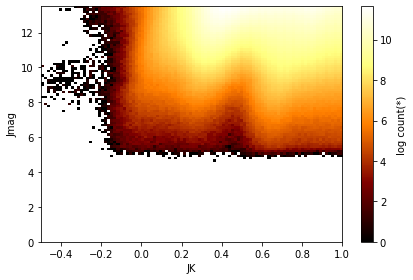

In [8]:
tmass.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

filter out only for A quality

## Check at each color range

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


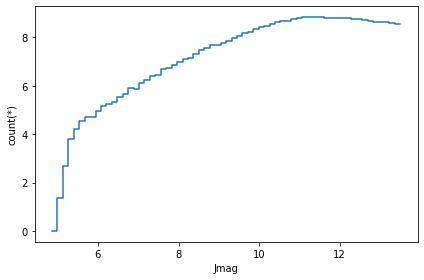

In [11]:
tmass_filt = tmass.filter("JK <0.1").filter("JK > 0")
tmass_filt = tmass_filt.extract()
tmass_filt.viz.histogram("Jmag", shape=100, show=True, limits=[0, 13.5], f='log')

looks nice to me!

# gaia

In [12]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

load gaia

In [13]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.012599945068359375,0.012599945068359375,0.0,nan,--,nan,nan,nan,-0.36550000309944153,gspphot,0.005600005388259888,0.00560000538

let's see the sky distribution using healpix.

Gaia data have special column called `source_id` which can be transformed into healpix index. Let's see the distribution of the data.

In [14]:
import healpy as hp

level = 6
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
epsilon = 1e-16
counts = gaia.count(binby=gaia.source_id/factor, limits=[-epsilon, nmax-epsilon], shape=nmax)
counts

array([129, 152, 150, ..., 388, 393, 387])

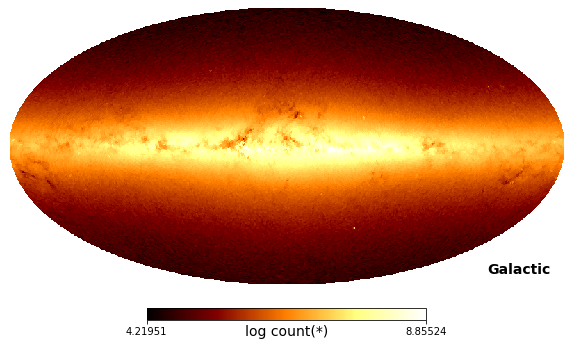

In [15]:
gaia.viz.healpix_heatmap(
    f="log",
    healpix_level=6,
    figsize=(10,8),
    healpix_output="galactic"
)

add color JK

In [16]:
gaia['JK'] = gaia['Jmag'] - gaia['Kmag']
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.012599945068359375,0.012599945068359375,0.0,nan,--,nan,nan,nan,-0.3

and the heatmap

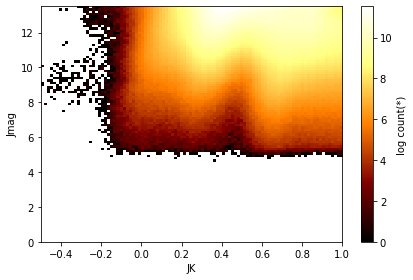

In [17]:
gaia.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

looks similar to 2MASS.

Let's compare them!

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


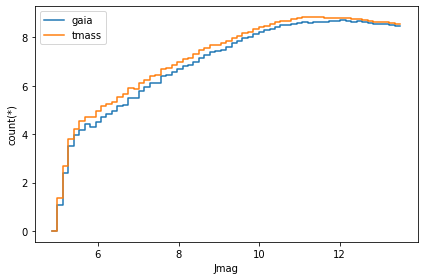

In [18]:
gaia_filt = gaia.filter("JK <0.1").filter("JK > 0")
gaia_filt = gaia_filt.extract()
gaia_filt.viz.histogram("Jmag", shape=100, label="gaia", limits=[0, 13.5], f='log')
tmass_filt.viz.histogram("Jmag", shape=100, label="tmass", limits=[0, 13.5], f='log')
plt.legend()

# Let's do some math

We are going to fit them for each color range.

-0.2 -0.06666666666666668
10
20
30


KeyboardInterrupt: 

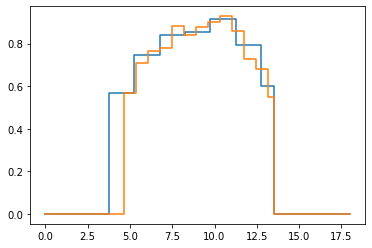

In [19]:
jks = np.linspace(-0.2, 1, 10)
for jk_low, jk_high in zip(jks[:-1], jks[1:]):
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    plt.figure(figsize=(6,4))
    for N in range(10, 51, 10):
        print(N)
        gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
        tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
        Js = np.linspace(0, 13.5, N)
        extend = np.linspace(13.5, 18, 20)
        Js = np.append(Js, extend)
        tmass_H[tmass_H==0] = 1
        gaia_H[tmass_H==0] = 0
        frac = gaia_H/tmass_H
        frac = np.append(frac, np.zeros_like(extend))
        plt.plot(Js, frac, drawstyle="steps-mid", label=N)
    plt.legend()
    plt.title(f"JK: {jk_low} < JK < {jk_high}")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.show()

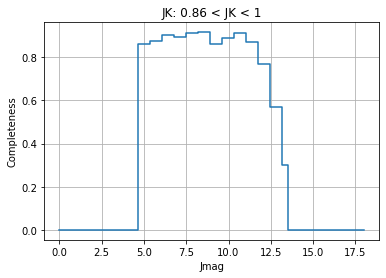

In [20]:
jk_high, jk_low = 1, 0.86
tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
tmass_filt = tmass_filt.extract()
gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
gaia_filt = gaia_filt.extract()

gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=20)
tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=20)
Js = np.linspace(0, 13.5, 20)
extend = np.linspace(13.5, 18, 20)
Js = np.append(Js, extend)
tmass_H[tmass_H==0] = 1
gaia_H[tmass_H==0] = 0
frac = gaia_H/tmass_H
ydata = np.append(frac, np.zeros_like(extend))
xdata = Js

plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

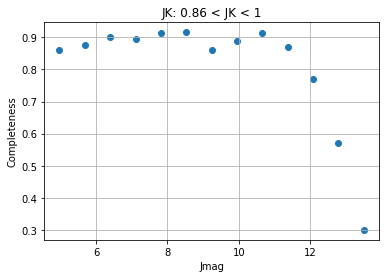

In [21]:
mask = (ydata != 0)
xd = xdata[mask]
yd = ydata[mask]

# plot
plt.scatter(xd, yd)
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


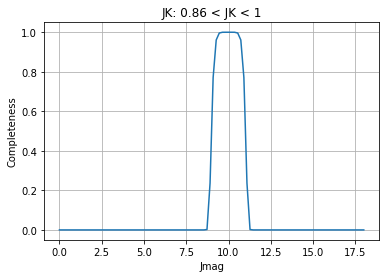

In [22]:
def window(x, x0, w, n):
    return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2

# plot
x = np.linspace(0, 18, 100)
plt.plot(x, window(x, 10, 1, 4))
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()


[-3.36216152e-05  5.83113392e-04  3.77625800e-03 -1.38499299e-01
  9.83790739e-01 -1.33150168e+00]


<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


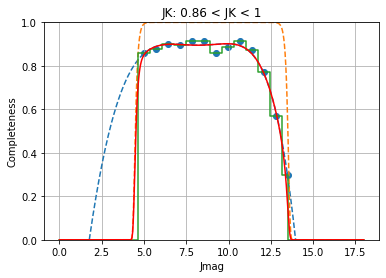

In [23]:
# polyfit
p = np.polyfit(xd, yd, 5)
print(p)
# evaluate
x = np.linspace(0, 18, 500)
y = np.polyval(p, x)
yw = window(x, 9, 4.5, 18)
# plot
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.plot(x, yw, ls="--")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, yw*y, c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()

[8.99216451 4.50046677]


<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


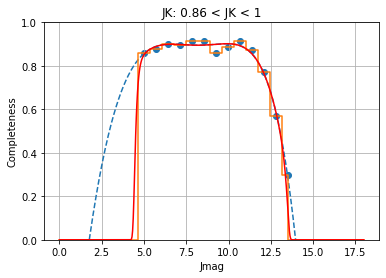

In [24]:
from scipy.optimize import curve_fit

x = np.linspace(0, 18, 500)
y = np.polyval(p, x)

p = np.polyfit(xd, yd, 5)
def comp_func(x, x0, w):
    return window(x, x0, w, 18)*np.polyval(p, x)

popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 4.5])
print(popt)
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, comp_func(x, *popt), c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()

In [26]:
p = 2.8
jk_s_stretch = np.linspace(0, 0.5**p, 14)
jks = np.power(jk_s_stretch, 1/p)-0.1
jk_bound = [np.round(jk,2) for jk in zip(jks[:-1], jks[1:])]



-0.1 0.1
0.1 0.16
0.16 0.2
0.2 0.23
0.23 0.26
0.26 0.28
0.28 0.3
0.3 0.32
0.32 0.34
0.34 0.36
0.36 0.37
0.37 0.39
0.39 0.4


-0.1 0.1
filter 2mass: 0.45 s
filter gaia: 0.31 s
count gaia: 0.30 s
count 2mass: 0.53 s
[8.99008467 4.49669391]


<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


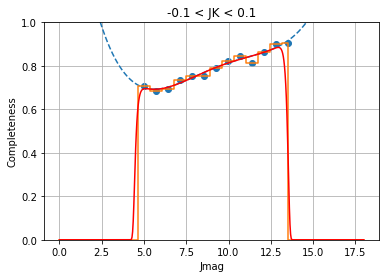

0.1 0.16
filter 2mass: 0.38 s
filter gaia: 0.30 s
count gaia: 0.23 s
count 2mass: 0.37 s
[9.05032137 4.43800936]


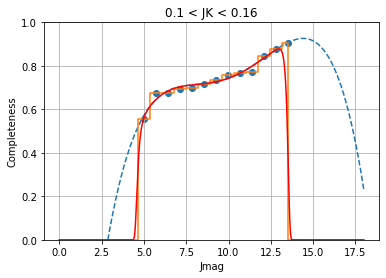

0.16 0.2
filter 2mass: 0.40 s
filter gaia: 0.30 s
count gaia: 0.21 s
count 2mass: 0.34 s
[8.98790809 4.49831881]


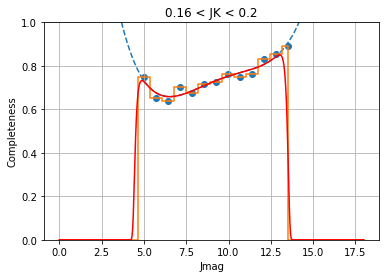

0.2 0.23
filter 2mass: 0.37 s
filter gaia: 0.32 s
count gaia: 0.25 s
count 2mass: 0.34 s
[8.98963124 4.49734064]


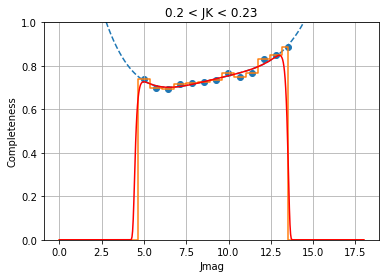

0.23 0.26
filter 2mass: 0.41 s
filter gaia: 0.30 s
count gaia: 0.15 s
count 2mass: 0.20 s
[8.98733969 4.49886619]


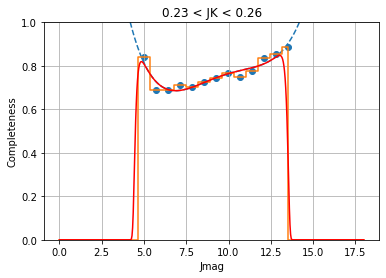

0.26 0.28
filter 2mass: 0.38 s
filter gaia: 0.30 s
count gaia: 0.14 s
count 2mass: 0.20 s
[8.99872463 4.48905432]


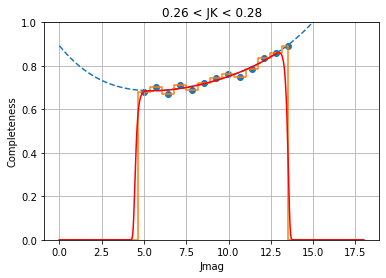

0.28 0.3
filter 2mass: 0.37 s
filter gaia: 0.30 s
count gaia: 0.13 s
count 2mass: 0.18 s
[8.99227404 4.49608324]


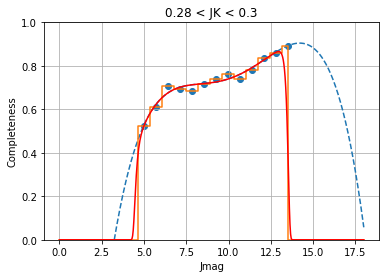

0.3 0.32
filter 2mass: 0.40 s
filter gaia: 0.30 s
count gaia: 0.16 s
count 2mass: 0.20 s
[9.00711638 4.48103731]


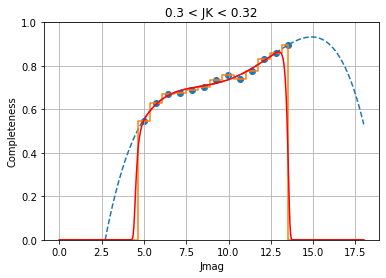

0.32 0.34
filter 2mass: 0.42 s
filter gaia: 0.34 s
count gaia: 0.16 s
count 2mass: 0.19 s
[9.04969547 4.43911583]


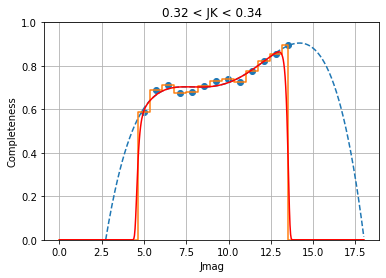

0.34 0.36
filter 2mass: 0.36 s
filter gaia: 0.35 s
count gaia: 0.12 s
count 2mass: 0.14 s
[8.98725654 4.49836285]


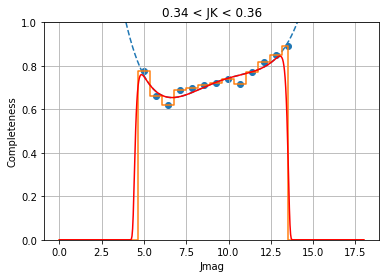

0.36 0.37
filter 2mass: 0.37 s
filter gaia: 0.30 s
count gaia: 0.14 s
count 2mass: 0.18 s
[8.63400297 4.849336  ]


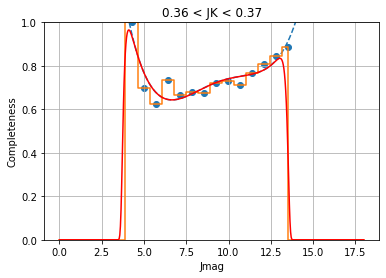

0.37 0.39
filter 2mass: 0.37 s
filter gaia: 0.35 s
count gaia: 0.12 s
count 2mass: 0.14 s
[8.98446302 4.50038922]


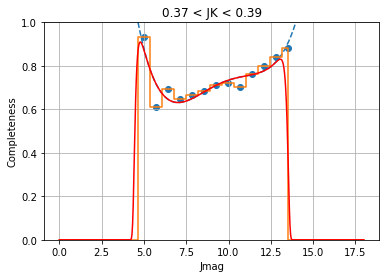

0.39 0.4
filter 2mass: 0.34 s
filter gaia: 0.31 s
count gaia: 0.13 s
count 2mass: 0.22 s
[9.0388825  4.45058391]


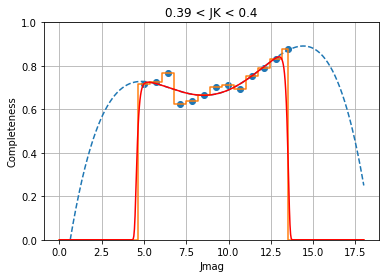

In [33]:
from time import time

p = 2.8
jk_s_stretch = np.linspace(0, 0.5**p, 14)
jks = np.power(jk_s_stretch, 1/p)-0.1
jk_bound = [np.round(jk,2) for jk in zip(jks[:-1], jks[1:])]

pol = []
popts = []

N= 20

for jk_low, jk_high in jk_bound:
    t0 = time()
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    t1 = time()
    print(f"filter 2mass: {t1-t0:.2f} s")
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    t2 = time()
    print(f"filter gaia: {t2-t1:.2f} s")
    gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
    t3 = time()
    print(f"count gaia: {t3-t2:.2f} s")
    tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
    t4 = time()
    print(f"count 2mass: {t4-t3:.2f} s")
    Js = np.linspace(0, 13.5, N)
    extend = np.linspace(13.5, 18, 20)
    Js = np.append(Js, extend)
    tmass_H[tmass_H==0] = 1
    gaia_H[tmass_H==0] = 0
    frac = gaia_H/tmass_H
    ydata = np.append(frac, np.zeros_like(extend))
    xdata = Js

    mask = (ydata != 0)
    xd = xdata[mask]
    yd = ydata[mask]

    p = np.polyfit(xd, yd, 4)
    pol.append(p)

    x = np.linspace(0, 18, 500)
    y = np.polyval(p, x)

    def comp_func(x, x0, w):
        return window(x, x0, w, 18)*np.polyval(p, x)

    popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 4.5])
    popts.append(popt)
    print(popt)
    plt.scatter(xd, yd)
    plt.plot(x, y, ls="--")
    plt.title(f"{jk_low} < JK < {jk_high}")
    plt.plot(xdata, ydata, drawstyle="steps-mid")
    plt.plot(x, comp_func(x, *popt), c="r")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.ylim(0,1)
    plt.show()

In [34]:
def comf(x, x0, w, p):
    return window(x, x0, w, 18)*np.polyval(p, x)

df_args = []

for jk_low, jk_high, p, popt in zip(jks[:-1], jks[1:], pol, popts):
    args_dict = {"x0": [popt[0]], "w": [popt[1]], 
    "p1": [p[0]], "p2": [p[1]], "p3": [p[2]], "p4": [p[3]], "p5": [p[4]], "jk_low": [jk_low], "jk_high": [jk_high]}
    if len(df_args) == 0:
        df_args = vaex.from_dict(args_dict)
    else:
        df_args = df_args.concat(vaex.from_dict(args_dict))
df_args

#,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.990084668762558,4.49669390981016,0.00021385820359461462,-0.008206459038701343,0.11489585041960479,-0.6654534979286871,2.0465587167812007,-0.1,0.10004748362056479
1,9.050321371179075,4.438009363573956,-0.00034506465415736073,0.014039368828624985,-0.20548460488675188,1.3064913908120621,-2.3621755155797644,0.10004748362056479,0.15623815909041774
2,8.987908090326028,4.498318811688844,0.00046983370601275494,-0.017955330567886812,0.2533653789765062,-1.5351204823997968,4.024197826427832,0.15623815909041774,0.19616486870714586
3,8.989631242120664,4.497340640145011,0.00021655372577961119,-0.007996954488970986,0.11083267298072969,-0.6645220511798953,2.147760983080007,0.19616486870714586,0.22821204738861625
4,8.987339688830627,4.498866187600026,0.0005559685505309221,-0.021620497471962395,0.310729305081001,-1.929674310951617,5.048969563344634,0.22821204738861625,0.2554391299851527
...,...,...,...,...,...,...,...,...,...
8,9.04969546959048,4.439115832613763,-0.00038977647510719164,0.015561616508095791,-0.2224328399560349,1.3676238991802867,-2.3736197231940137,0.32040244292035924,0.33846404797917706
9,8.987256536162343,4.498362850036749,0.0005801824742667176,-0.02213213078694522,0.31174587145359606,-1.8932467350405875,4.832009767776412,0.33846404797917706,0.3552772506193753
10,8.634002968798445,4.849335997314831,0.0007630955750444103,-0.02895467290310898,0.4043956447966038,-2.435109206742598,5.976172095555716,0.3552772506193753,0.37104137036463136
11,8.984463015156422,4.500389219784841,0.0009753866582292477,-0.038087605567778904,0.5485521865559123,-3.4204943913757626,8.417839465085592,0.37104137036463136,0.3859090260156638


In [35]:
df_args.export(join(data_dir, "coefficients.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
 

# LOAD COEFFs

In [36]:
df_args = vaex.open(join(data_dir, "coefficients.hdf5"))
df_args = df_args.to_pandas_df()
df_args

,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.990085,4.496694,0.000214,-0.008206,0.114896,-0.665453,2.046559,-0.100000,0.100047
1,9.050321,4.438009,-0.000345,0.014039,-0.205485,1.306491,-2.362176,0.100047,0.156238
2,8.987908,4.498319,0.000470,-0.017955,0.253365,-1.535120,4.024198,0.156238,0.196165
3,8.989631,4.497341,0.000217,-0.007997,0.110833,-0.664522,2.147761,0.196165,0.228212
4,8.987340,4.498866,0.000556,-0.021620,0.310729,-1.929674,5.048970,0.228212,0.255439
5,8.998725,4.489054,0.000029,-0.000986,0.015125,-0.095862,0.892575,0.255439,0.279354
6,8.992274,4.496083,-0.000403,0.016519,-0.245197,1.584881,-3.079727,0.279354,0.300824
7,9.007116,4.481037,-0.000261,0.010863,-0.162197,1.058601,-1.877887,0.300824,0.320402
8,9.049695,4.439116,-0.000390,0.015562,-0.222433,1.367624,-2.373620,0.320402,0.338464
9,8.987257,4.498363,0.000580,-0.022132,0.311746,-1.893247,4.832010,0.338464,0.355277


reconstruct

<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


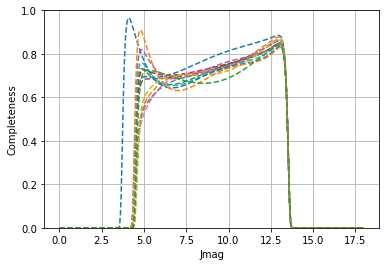

In [37]:
x = np.linspace(0, 18, 500)

# iterate over rows with iterrows
for index, row in df_args.iterrows():
    x0 = row.x0
    w = row.w
    p = [row.p1, row.p2, row.p3, row.p4, row.p5]
    y = comf(x, x0, w, p)
    plt.plot(x, y, ls="--", )
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()


create a function that take `j` mag and color `jk`, return it's completeness.

<ipython-input-22-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


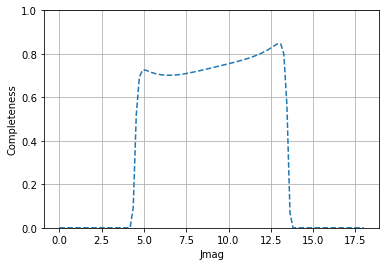

In [38]:
jk_lows = df_args.jk_low.values
jk_highs = df_args.jk_high.values
x0s = df_args.x0.values
x0s = np.append(x0s, 0)
ws = df_args.w.values
ws = np.append(ws, 1)
ps = df_args[["p1", "p2", "p3", "p4", "p5"]].values
ps = np.append(ps, np.zeros((len(ps), 5)), axis=0)

def polyv(p, j):
    print(p.shape)
    print(j.shape)
    return np.polyval(p, j)

def compjk(j, jk):
    index = np.searchsorted(jk_highs, jk)
    x0 = x0s[index]
    w = ws[index]
    p = ps[index]
    polifit_v = np.array([np.polyval(pi, ji) for pi, ji in zip(p, j)])
    return np.select([jk > 0.4, jk < -0.1], [0, 0], default=window(j, x0, w, 18)*polifit_v)

js = np.linspace(0, 18, 100)
jks = np.ones_like(js)*0.2

plt.plot(js, compjk(js, jks), ls="--")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()
